<a href="https://colab.research.google.com/github/AbhigyanSingh97/Fake-News-Detection/blob/master/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from wordcloud import STOPWORDS,WordCloud
import nltk
import re
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv('/content/drive/My Drive/data/FakeNews/fakenews/fake-news/train.csv')
test=pd.read_csv('/content/drive/My Drive/data/FakeNews/fakenews/fake-news/test.csv')

In [0]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = ((df.isnull().sum())/len(df))*100
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [5]:
check_missing_data(train)

,id,title,author,text,label
Total,0,558,1957,39,0
Percent,0,2.68269,9.40865,0.1875,0
Types,int64,object,object,object,int64


In [6]:
check_missing_data(test)

,id,title,author,text
Total,0,122,503,7
Percent,0,2.34615,9.67308,0.134615
Types,int64,object,object,object


In [0]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Visualizing using word clouds

In [0]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [0]:
from wordcloud import WordCloud

In [11]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
fakewords = ""
realwords = ""

for val in train[train['label']==1].total:
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()

  realwords += " ".join(tokens)+" "

for val in train[train['label']==0].total:
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  fakewords += " ".join(tokens)+" "

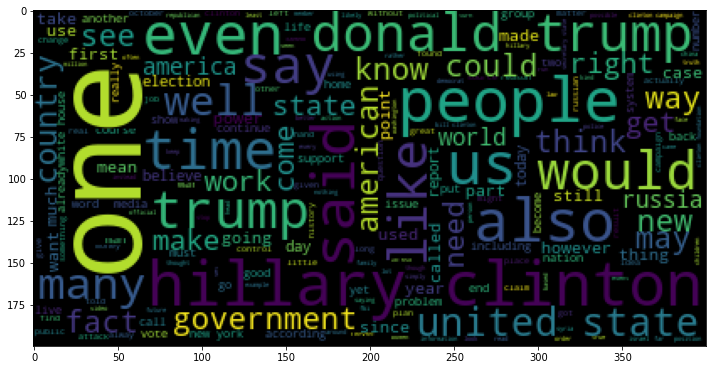

In [13]:
wordcloud = WordCloud(stopwords=stop_words).generate(realwords)

plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.tight_layout()

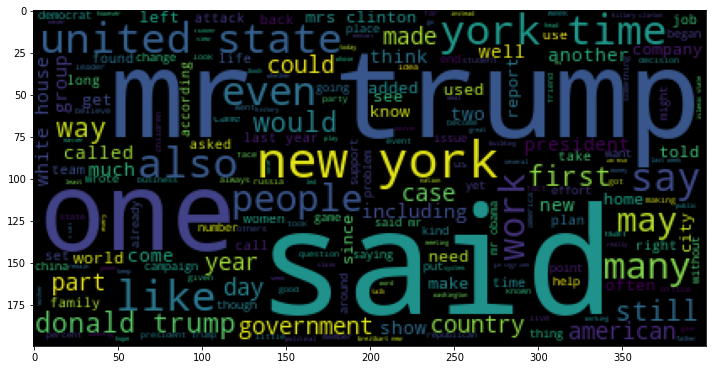

In [14]:
wordcloud = WordCloud(stopwords=stop_words).generate(fakewords)

plt.figure(figsize = (10,8))
plt.imshow(wordcloud)
plt.tight_layout()

# Preprocessing

In [0]:
lemmatizer = WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''

    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence)

    words = nltk.word_tokenize(sentence)

    words = [w for w in words if not w in stop_words]

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

    train.loc[index,'total'] = filter_sentence

In [16]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lette...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitb...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnewsc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike ha...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished st...


# NLP techniques

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [0]:
x_train = train['total']
y_train = train['label']

## Model

In [0]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_train)
freq_term_matrix = count_vectorizer.transform(x_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [20]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

In [0]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)


from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(tf_idf_matrix,y_train,random_state = 0)

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

Log_model = LogisticRegression().fit(X_train,Y_train)

In [23]:
Log_model.score(X_train,Y_train)

0.9826923076923076

In [24]:
Log_model.score(X_test,Y_test)

0.9601923076923077

In [0]:
pred = Log_model.predict(X_test)

In [26]:
confusion_matrix(Y_test,pred)

array([[2444,  120],
       [  87, 2549]])

## MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
NB_model = MultinomialNB().fit(X_train,Y_train)
NB_pred = NB_model.predict(X_test)

In [29]:
print(NB_model.score(X_train,Y_train))
print(NB_model.score(X_test,Y_test))

0.8840384615384616
0.8348076923076924


In [30]:
confusion_matrix(Y_test,NB_pred)

array([[2558,    6],
       [ 853, 1783]])

# Using Deep learning

In [31]:
import keras
from keras.layers import Dense,Dropout,LSTM,Embedding
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
X = train['total']
Y = train['label']

In [0]:
voc_Size = 4500

In [0]:
enc_data = [one_hot(words,voc_Size) for words in X]

In [0]:
embedded_data = pad_sequences(enc_data,padding='pre',maxlen = 30)

In [0]:
model = Sequential()
model.add(Embedding(4500,50,input_length=30))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = Adam(),metrics = ['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 50)            225000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 295,601
Trainable params: 295,601
Non-trainable params: 0
________________________________________________

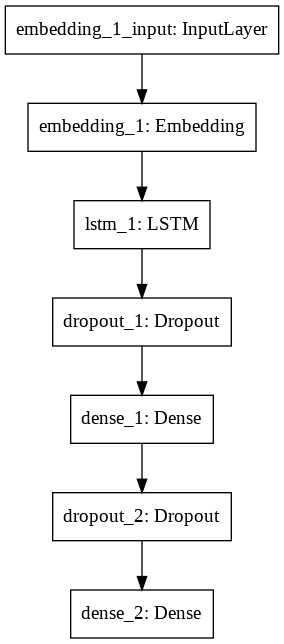

In [38]:
keras.utils.plot_model(model)

In [0]:
X_final = np.array(embedded_data)
Y_final = np.array(Y)

In [0]:
train_x,test_x,train_y,test_y = train_test_split(X_final,Y_final,random_state = 0)

In [0]:
lr_Reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=4,min_lr = 0.0001)

In [42]:
fit_model = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs = 100,batch_size=64,callbacks=[lr_Reduction])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15600 samples, validate on 5200 samples
Epoch 1/100
15600/15600 [==============================] - 24s 2ms/step - loss: 0.3901 - accuracy: 0.8147 - val_loss: 0.2911 - val_accuracy: 0.8719
Epoch 2/100
15600/15600 [==============================] - 23s 1ms/step - loss: 0.2168 - accuracy: 0.9109 - val_loss: 0.2923 - val_accuracy: 0.8750
Epoch 3/100
15600/15600 [==============================] - 23s 1ms/step - loss: 0.1512 - accuracy: 0.9431 - val_loss: 0.3740 - val_accuracy: 0.8662
Epoch 4/100
15600/15600 [==============================] - 22s 1ms/step - loss: 0.0999 - accuracy: 0.9639 - val_loss: 0.3995 - val_accuracy: 0.8588
Epoch 5/100
15600/15600 [==============================] - 23s 1ms/step - loss: 0.0673 - accuracy: 0.9749 - val_loss: 0.5971 - val_accuracy: 0.8556
Epoch 6/100
15600/15600 [==============================] - 22s 1ms/step - loss: 0.0471 - accuracy: 0.9831 - val_loss: 0.6025 - val_accuracy: 0.8540
Epoch 7/100
15600/15600 [==============================] - 21s 

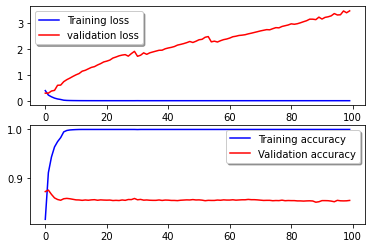

In [43]:
fig, ax = plt.subplots(2,1)
ax[0].plot(fit_model.history['loss'], color='b', label="Training loss")
ax[0].plot(fit_model.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(fit_model.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(fit_model.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## GRU

In [0]:
from keras.layers import GRU

In [0]:
model_gru = Sequential()
model_gru.add(Embedding(4500,50,input_length=30))
model_gru.add(GRU(100))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(100,activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1,activation='sigmoid'))

model_gru.compile(loss = 'binary_crossentropy',optimizer = Adam(),metrics = ['accuracy'])

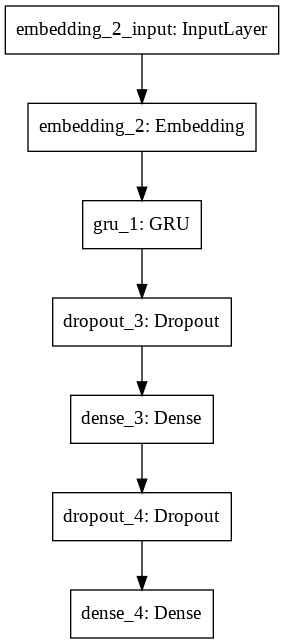

In [46]:
keras.utils.plot_model(model_gru)

In [47]:
fit_model_gru = model_gru.fit(train_x,train_y,validation_data=(test_x,test_y),epochs = 100,batch_size=64,callbacks=[lr_Reduction])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15600 samples, validate on 5200 samples
Epoch 1/100
15600/15600 [==============================] - 29s 2ms/step - loss: 0.3952 - accuracy: 0.8116 - val_loss: 0.3024 - val_accuracy: 0.8652
Epoch 2/100
15600/15600 [==============================] - 29s 2ms/step - loss: 0.2249 - accuracy: 0.9083 - val_loss: 0.3243 - val_accuracy: 0.8694
Epoch 3/100
15600/15600 [==============================] - 28s 2ms/step - loss: 0.1654 - accuracy: 0.9371 - val_loss: 0.3248 - val_accuracy: 0.8731
Epoch 4/100
15600/15600 [==============================] - 30s 2ms/step - loss: 0.1167 - accuracy: 0.9554 - val_loss: 0.3804 - val_accuracy: 0.8573
Epoch 5/100
15600/15600 [==============================] - 28s 2ms/step - loss: 0.0848 - accuracy: 0.9694 - val_loss: 0.4836 - val_accuracy: 0.8660
Epoch 6/100
15600/15600 [==============================] - 29s 2ms/step - loss: 0.0511 - accuracy: 0.9810 - val_loss: 0.6157 - val_accuracy: 0.8596
Epoch 7/100
15600/15600 [==============================] - 29s 

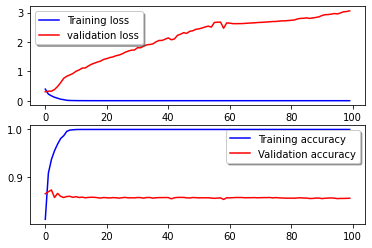

In [48]:
fig, ax = plt.subplots(2,1)
ax[0].plot(fit_model_gru.history['loss'], color='b', label="Training loss")
ax[0].plot(fit_model_gru.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(fit_model_gru.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(fit_model_gru.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Preprocessing test data

In [49]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [0]:
for index,row in test.iterrows():
    filter_sentence = ''

    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence)

    words = nltk.word_tokenize(sentence)

    words = [w for w in words if not w in stop_words]

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

    test.loc[index,'total'] = filter_sentence

In [51]:
test.columns

Index(['id', 'title', 'author', 'text', 'total'], dtype='object')

In [0]:
test.drop(['id', 'title', 'author', 'text'],axis=1,inplace = True)

In [0]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

In [54]:
Log_model.predict(test_tfidf)

array([0, 1, 1, ..., 0, 1, 0])

In [55]:
test['total'][0]

' specter trump loosens tongues not purse strings silicon valley the new york times david streitfeldpalo alto calif after year scorning political process silicon valley leapt fray the prospect president donald j trump pushing tech community move beyond traditional role donor embrace new existence agitator activist a distinguished venture capital firm emblazoned corporate home page earthy epithet one prominent tech chieftain say consequence mr trumps election would range disastrous terrible another compare dictator and nearly 150 tech leader signed open letter decrying mr trump campaign anger bigotry not quite action peter thiel founder paypal palantir first outside investor facebook spoke republican convention july the new york times reported saturday mr thiel giving 1 25 million support mr trumps candidacy even supporter flee he also recently gave 1 million super pac support senator rob portman republican freshman running ohio getting involved politics used seen clashing silicon valle

In [56]:
NB_model.predict(test_tfidf)

array([0, 1, 1, ..., 0, 1, 0])